In [1]:

# coding: utf-8

import sys
sys.path.append('..')
from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'

corpus, word_to_id, id_to_word = preprocess(text)
print( corpus)
print ( id_to_word)


import numpy as np
 
def create_contexts_target(corpus, window_size=1):
    '''맥락과 타깃 생성
 
    :param corpus: 말뭉치(단어 ID 목록)
    :param window_size: 윈도우 크기(윈도우 크기가 1이면 타깃 단어 좌우 한 단어씩이 맥락에 포함)
    :return:
    '''
    target = corpus[window_size:-window_size]
    contexts = []

    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size + 1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])
        contexts.append(cs)

        return np.array(contexts), np.array(target)

contexts, target = create_contexts_target(corpus, window_size =1)
 
print (contexts)
print (target)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
[[0 2]]
[1 2 3 4 1 5]


### ※ 문제3.(점심시간 문제) You say goodbye and i say hello 말고 다른 문장을 넣어서 CBOW 신경망에 넣기 위한 원핫 표현으로 출력하시오
    문장 ----------------> 단어id ---------------------------> 맥락과 타겟 ----------------> 원핫표현
          preprocess 함수          create_contexts_target함수              convert_one_hot

In [3]:
text = 'whatever i say, you will never understand what i said'

corpus, word_to_id, id_to_word = preprocess(text)
contexts, target = create_contexts_target(corpus, window_size =1)
 
print (contexts)
print (target)

[[0 2]]
[1 2 3 4 5 6 7 1]


    원핫 표현 ---------> 신경망
                          ↓
                        가중치 (입력 / 출력 가중치)
                          ↓
                        단어의 분산 표현
                          ↓
                        컴퓨터가 단어의 의미를 깨달을 수 있게 하는 것이 목표 / 컴퓨터가 유사한 단어들을 스스로 정리해서 알 수 있도록

    2장 : 개선된(차원 축소를 이용한) 통계기법
    3장 : 신경망을 이용한 단어의 분산표현 추출
                        

### ※ 문제4. You say goodbye and i say hello. 문장을 CBOW 신경망에 넣고 $\rm{W_{in}}$의 가중치를 뽑아서 출력하시오

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 208 |  반복 1 / 2 | 시간 0[s] | 손실 1.24
| 에폭 209 |  반복 1 / 2 | 시간 0[s] | 손실 1.21
| 에폭 210 |  반복 1 / 2 | 시간 0[s] | 손실 1.28
| 에폭 211 |  반복 1 / 2 | 시간 0[s] | 손실 1.11
| 에폭 212 |  반복 1 / 2 | 시간 0[s] | 손실 1.23
| 에폭 213 |  반복 1 / 2 | 시간 0[s] | 손실 1.18
| 에폭 214 |  반복 1 / 2 | 시간 0[s] | 손실 1.19
| 에폭 215 |  반복 1 / 2 | 시간 0[s] | 손실 1.19
| 에폭 216 |  반복 1 / 2 | 시간 0[s] | 손실 1.20
| 에폭 217 |  반복 1 / 2 | 시간 0[s] | 손실 1.18
| 에폭 218 |  반복 1 / 2 | 시간 0[s] | 손실 1.16
| 에폭 219 |  반복 1 / 2 | 시간 0[s] | 손실 1.20
| 에폭 220 |  반복 1 / 2 | 시간 0[s] | 손실 1.10
| 에폭 221 |  반복 1 / 2 | 시간 0[s] | 손실 1.21
| 에폭 222 |  반복 1 / 2 | 시간 0[s] | 손실 1.18
| 에폭 223 |  반복 1 / 2 | 시간 0[s] | 손실 1.24
| 에폭 224 |  반복 1 / 2 | 시간 0[s] | 손실 1.08
| 에폭 225 |  반복 1 / 2 | 시간 0[s] | 손실 1.15
| 에폭 226 |  반복 1 / 2 | 시간 0[s] | 손실 1.15
| 에폭 227 |  반복 1 / 2 | 시간 0[s] | 손실 1.15
| 에폭 228 |  반복 1 / 2 | 시간 0[s] | 손실 1.21
| 에폭 229 |  반복 1 / 2 | 시간 0[s] | 손실 1.08
| 에폭 230 |  반복 1 / 2 | 시간 0[s] | 손실 1.13
| 에폭 231 |  반복 1 / 2 | 시간 0[s] | 손실 1.14
| 에폭 232 |  반복 1

| 에폭 487 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 488 |  반복 1 / 2 | 시간 0[s] | 손실 0.76
| 에폭 489 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 490 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 491 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 492 |  반복 1 / 2 | 시간 0[s] | 손실 0.70
| 에폭 493 |  반복 1 / 2 | 시간 0[s] | 손실 0.76
| 에폭 494 |  반복 1 / 2 | 시간 0[s] | 손실 0.64
| 에폭 495 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 496 |  반복 1 / 2 | 시간 0[s] | 손실 0.70
| 에폭 497 |  반복 1 / 2 | 시간 0[s] | 손실 0.69
| 에폭 498 |  반복 1 / 2 | 시간 0[s] | 손실 0.83
| 에폭 499 |  반복 1 / 2 | 시간 0[s] | 손실 0.56
| 에폭 500 |  반복 1 / 2 | 시간 0[s] | 손실 0.70
| 에폭 501 |  반복 1 / 2 | 시간 0[s] | 손실 0.82
| 에폭 502 |  반복 1 / 2 | 시간 0[s] | 손실 0.76
| 에폭 503 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 504 |  반복 1 / 2 | 시간 0[s] | 손실 0.63
| 에폭 505 |  반복 1 / 2 | 시간 0[s] | 손실 0.70
| 에폭 506 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 507 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 508 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 509 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 510 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 511 |  반복 1

| 에폭 742 |  반복 1 / 2 | 시간 0[s] | 손실 0.63
| 에폭 743 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 744 |  반복 1 / 2 | 시간 0[s] | 손실 0.52
| 에폭 745 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 746 |  반복 1 / 2 | 시간 0[s] | 손실 0.52
| 에폭 747 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 748 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 749 |  반복 1 / 2 | 시간 0[s] | 손실 0.41
| 에폭 750 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 751 |  반복 1 / 2 | 시간 0[s] | 손실 0.41
| 에폭 752 |  반복 1 / 2 | 시간 0[s] | 손실 0.69
| 에폭 753 |  반복 1 / 2 | 시간 0[s] | 손실 0.38
| 에폭 754 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 755 |  반복 1 / 2 | 시간 0[s] | 손실 0.57
| 에폭 756 |  반복 1 / 2 | 시간 0[s] | 손실 0.50
| 에폭 757 |  반복 1 / 2 | 시간 0[s] | 손실 0.58
| 에폭 758 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 759 |  반복 1 / 2 | 시간 0[s] | 손실 0.41
| 에폭 760 |  반복 1 / 2 | 시간 0[s] | 손실 0.69
| 에폭 761 |  반복 1 / 2 | 시간 0[s] | 손실 0.50
| 에폭 762 |  반복 1 / 2 | 시간 0[s] | 손실 0.51
| 에폭 763 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 764 |  반복 1 / 2 | 시간 0[s] | 손실 0.74
| 에폭 765 |  반복 1 / 2 | 시간 0[s] | 손실 0.34
| 에폭 766 |  반복 1

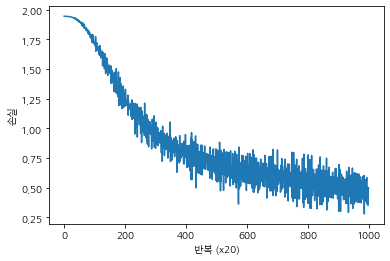

you [ 1.2059436  -0.9955805  -1.557191    0.95319366  0.80576056]
say [-0.1942487   1.1927837  -0.28799313 -1.2248955  -1.2563974 ]
goodbye [ 0.6673847  -1.0126442  -0.08349952  0.9761307   1.1123346 ]
and [ 1.684728    1.0228697  -1.5706351  -0.94107705 -1.0075439 ]
i [ 0.6600253  -1.0101641  -0.09133986  0.97521627  1.1213068 ]
hello [ 1.1939746  -1.0015533  -1.5776217   0.95187753  0.8055612 ]
. [-1.3985882  1.0867338  1.4902674 -1.1583413 -1.1895562]


In [7]:
# coding: utf-8
from common.util import preprocess, create_contexts_target, convert_one_hot # 문장을 원핫표현으로 변경하기 위해 필요한 함수들
from ch03.simple_cbow import SimpleCBOW # word2vec 신경망 CBOW 구현
from common.optimizer import Adam
from common.trainer import Trainer # keras model.compile 구현
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정


window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

### ※ 문제5. 아래의 결과는 CBOW 신경망에서 뽑은 입력층의 가중치 벡터이다. 이 가중치 벡터를 이용해서 you와 i와의 코사인 유사도를 출력하시오
    you     [ 1.2059436  -0.9955805  -1.557191    0.95319366  0.80576056]
    say     [-0.1942487   1.1927837  -0.28799313 -1.2248955  -1.2563974 ]
    goodbye [ 0.6673847  -1.0126442  -0.08349952  0.9761307   1.1123346 ]
    and     [ 1.684728    1.0228697  -1.5706351  -0.94107705 -1.0075439 ]
    i       [ 0.6600253  -1.0101641  -0.09133986  0.97521627  1.1213068 ]
    hello   [ 1.1939746  -1.0015533  -1.5776217   0.95187753  0.8055612 ]
    .       [-1.3985882  1.0867338  1.4902674 -1.1583413 -1.1895562]

In [8]:
you = np.array([1.2059436,  -0.9955805,  -1.557191,    0.95319366,  0.80576056])
say = np.array([-0.1942487,   1.1927837,  -0.28799313, -1.2248955,  -1.2563974])
goodbye = np.array([0.6673847,  -1.0126442,  -0.08349952,  0.9761307,   1.1123346])
and1 = np.array([1.684728,    1.0228697,  -1.5706351,  -0.94107705, -1.0075439])
i = np.array([0.6600253,  -1.0101641,  -0.09133986,  0.97521627,  1.1213068])
hello = np.array([1.1939746,  -1.0015533,  -1.5776217,   0.95187753,  0.8055612])
dot = np.array([-1.3985882,  1.0867338,  1.4902674, -1.1583413, -1.1895562])

def cos_similarity(x, y, eps=1e-8):
    '''코사인 유사도 산출

    :param x: 벡터
    :param y: 벡터
    :param eps: '0으로 나누기'를 방지하기 위한 작은 값
    :return:
    '''
    nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
    ny = y / (np.sqrt(np.sum(y ** 2)) + eps)
    return np.dot(nx, ny)

print(cos_similarity(you, i))

0.7773234656554537


### ※ 문제6. 어제 마지막 문제처럼 위의 밀집벡터(단어의 분산표현)을 이용해서 you와 가장 가까운 거리에 있는 단어들이 무엇인지 top 5개를 출력하시오

In [9]:
from common.util import most_similar, create_co_matrix, preprocess
import numpy as np
import sys

sys.path.append('..')

window_size = 1

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

# word_vecs = U[:, :wordvec_size]

querys = ['you']

for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)


[query] you
 hello: 0.9999596476554871
 i: 0.7773234844207764
 goodbye: 0.776348888874054
 and: 0.2403094619512558
 say: -0.5784717202186584


    (p.147) 통계기법 vs 추론기법 둘 중에 추론기법이 더 정확하게 단어의 의미를 파악한다고 하지만 단순히 단어의 유사성을 나타낼 때는 우열을 가릴 수 없다고 한다.
    신경망은 입력되는 데이터의 크기가 커야 신경망이 더 예측을 잘한다.

### ※ 문제7. 어제 사용한 큰 말뭉치인 PTB 말뭉치를 CBOW 신경망에 넣고 입력 가중치를 뽑아내 보시오

In [10]:
# coding: utf-8
import numpy as np
from common.util import most_similar, create_co_matrix, ppmi
from dataset import ptb
from common.util import preprocess, create_contexts_target, convert_one_hot
from ch03.simple_cbow import SimpleCBOW  
from common.optimizer import Adam
from common.trainer import Trainer 
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정


window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

MemoryError: Unable to allocate 34.6 GiB for an array with shape (929587, 10000) and data type int32

### <b>■ SimpleCBOW 클래스의 forward와 backward의 이해</b>
![fig3-20](dl2_images/fig3-20.png)
```python
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss

    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)

        return None
```

### ※ 문제8. SimpleCBOW 클래스의 순전파 함수를 실행해서 출력된 결과를 확인하시오

In [11]:
from common.util import preprocess, create_contexts_target, convert_one_hot
from ch03.simple_cbow import SimpleCBOW

text = 'You say goodbye and I say hello.'

window_size = 1
hidden_size = 5

corpus, word_to_id, id_to_word = preprocess(text)
contexts, target = create_contexts_target(corpus, window_size)

vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)

result = model.forward(contexts, target)

print(result)


1.9459292715441814


#### <b>3장 정리</b>
    2장에서는 개선된 통계기법으로 단어의 분산 표현을 얻었는데
    3장에서는 신경망을 이용해서 단어의 분산 표현을 얻음
    단어의 분산 표현이 컴퓨터가 단어의 의미를 이해하는 중요한 정보. CNN에서 이미지를 분류한 신경망의 가중치와 같은 정보.
    
    큰 말뭉치 ----------> 신경망 (에러 발생)
    큰 말뭉치 ----------> embedding -----------> 신경망 (4장)

### <b>■ 신경망 활용 홈페이지</b>
    1. Rshiny에서 cifar10 이미지를 분류하는 UI 화면을 띄우는 연습
    2. Rshiny에서 cifar10 이미지를 분류하는 홈페이지를 구현
    3. 이파리 데이터의 모델로 정상 이파리와 질병 이파리를 분류하는 UI화면을 구현
    
    신경망을 구현
    
    1. 모델 (*.h5)
    2. 첫 화면에 로드될 사진(*.jpg,png)
    3. synset.txt (정답 라벨)
    4. 나머지 파일들 (bootstrap.css, etc.)
    5. Rshiny 코드 수정
        모델 이름, 사진 파일명
    
### <b>■ 모델을 생성하는 코드 review</b>
    1. CNN 목차 : http://cafe.daum.net/oracleoracle/Sedp/502
    2. 이미지 증식 : http://cafe.daum.net/oracleoracle/Sedp/514